# Tugas Pertemuan 10 Data Mining

## Aulia Diaz Gustiavani
## A11.2022.14446
## A11.4509

# Implementasi Python dengan Dataset txt

### Import Library yang dibutuhkan

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

### Membaca Dataset dari File

In [42]:
datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

### Mendefinisikan Parameter K-Means Klastering

In [43]:
k = 2 #jumlah klaster yang diinginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset #input data

### Fungsi untuk Inisialisasi Titik Pusat Klaster (random)

In [44]:
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

### Fungsi untuk Plot Hasil Klaster per Iterasi

In [45]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
  n = listClusterMembers.__len__()
  color = iter(cm.rainbow(np.linspace(0, 1, n)))
  plt.figure("result")
  plt.clf()
  plt.title("iteration-" + iteration)
  marker = itertools.cycle(('.', '*', '^', 'x', '+'))
  for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), 
                         marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
  for i in range(n):
    plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),
                        c=col, label="centroid" + str(i+1))
  if(converged == 0):
    plt.legend()
    plt.ion()
    plt.show()
    plt.pause(0.1)
  if(converged == 1):
    plt.legend()
    plt.show(block=True)

### Fungsi utama Algoritma K-Means

In [46]:
#fungsi utama algoritma k-means
def kMeans(data, centroidInit):
    nCluster = k #banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)

    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))

        #ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data, centroidRepeated))

            #hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)

        #tempatkan data ke klaster yang jarak Euclideannya plg dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):  # Assign data to cluster regarding cluster matrix
            listClusterMember[int(clusterMatrix[i])].append(data[i, :])

        #hitung titik pusat klaster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)

        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        
        # update titik pusat klaster dengan nilai yg baru
        centroidInit = newCentroid

        #plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

### Panggil Fungsi inisialisasi klaster

iter:  1
centroid:  [[-10.53528718  -1.28877436]
 [  2.10307484   0.40066646]]


C:\Users\Aulia Diaz\AppData\Local\Temp\ipykernel_19896\1503686798.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
C:\Users\Aulia Diaz\AppData\Local\Temp\ipykernel_19896\1503686798.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),


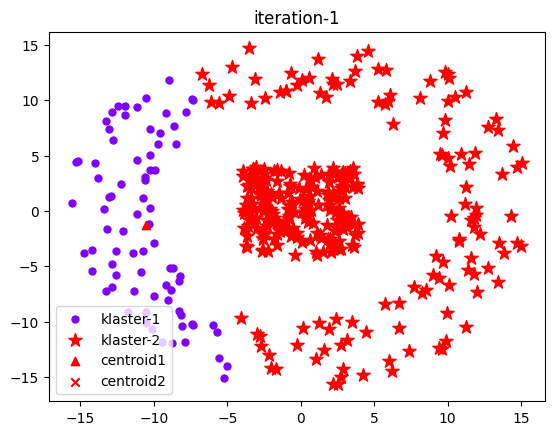

iter:  2
centroid:  [[-10.12634286  -1.18838214]
 [  2.23433703   0.40605791]]


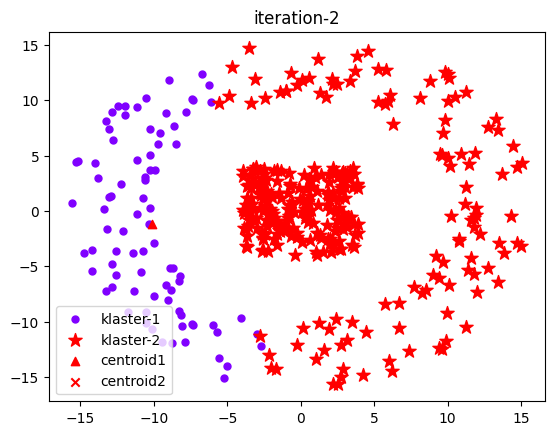

iter:  3
centroid:  [[-9.77710337 -1.22762809]
 [ 2.33311865  0.44292315]]


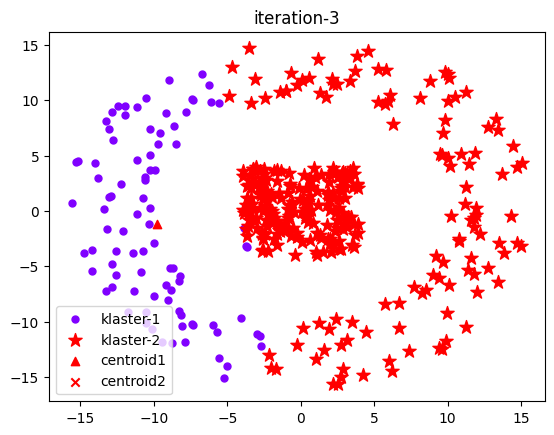

iter:  4
centroid:  [[-9.30379479 -1.47671146]
 [ 2.46250658  0.5600477 ]]


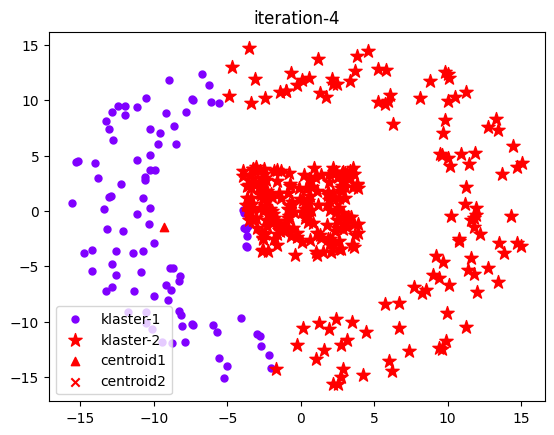

iter:  5
centroid:  [[-9.00184653 -1.54819604]
 [ 2.55727157  0.61825418]]


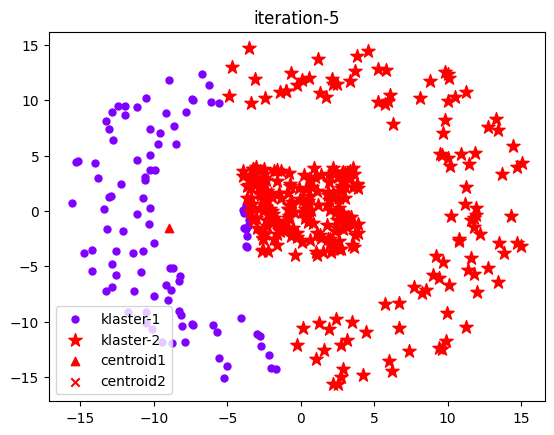

iter:  6
centroid:  [[-8.63966111 -1.44066019]
 [ 2.70041473  0.6304161 ]]


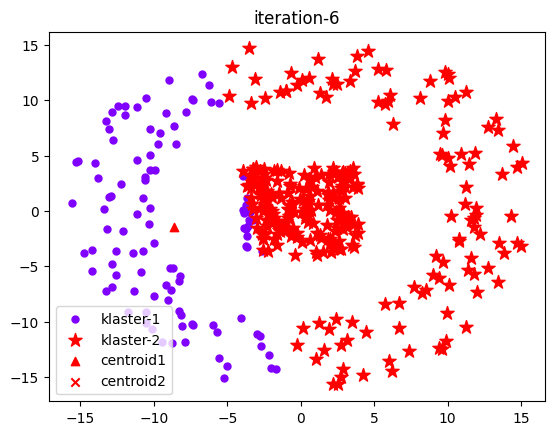

iter:  7
centroid:  [[-8.22866496 -1.29138974]
 [ 2.89113604  0.6345682 ]]


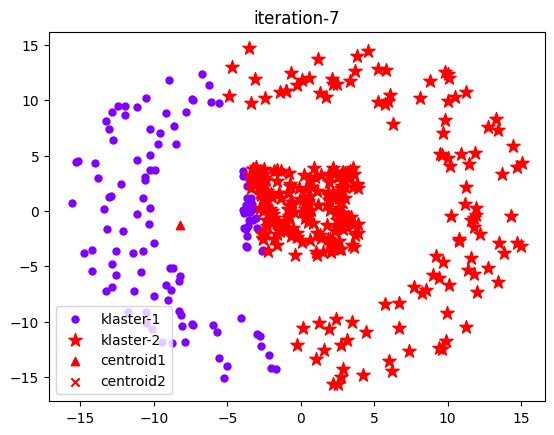

iter:  8
centroid:  [[-7.78240312 -1.12666016]
 [ 3.13082831  0.6349364 ]]


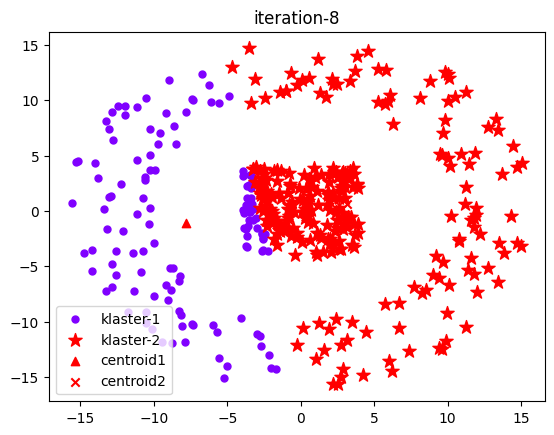

iter:  9
centroid:  [[-7.3007662  -0.79124437]
 [ 3.45793217  0.54591822]]


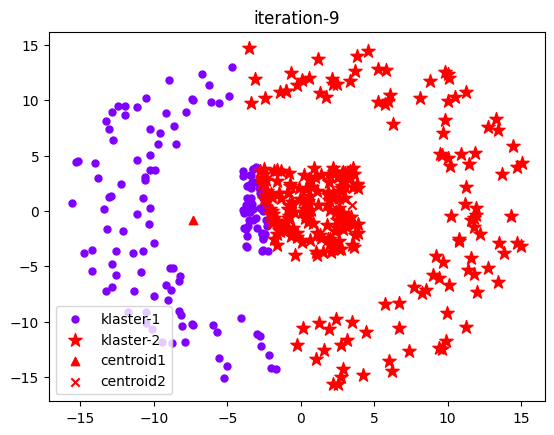

iter:  10
centroid:  [[-6.6663681  -0.46358773]
 [ 3.97491857  0.43905063]]


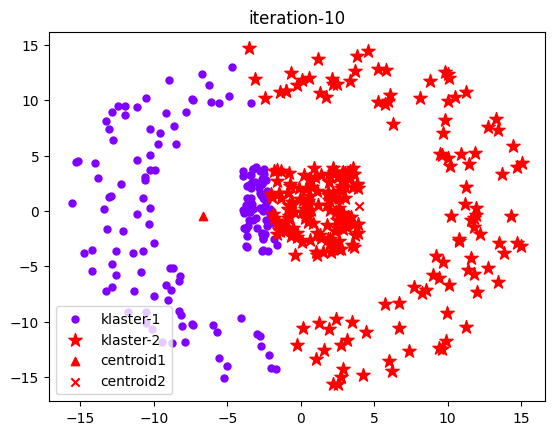

iter:  11
centroid:  [[-6.24330559 -0.21242905]
 [ 4.40266697  0.30097285]]


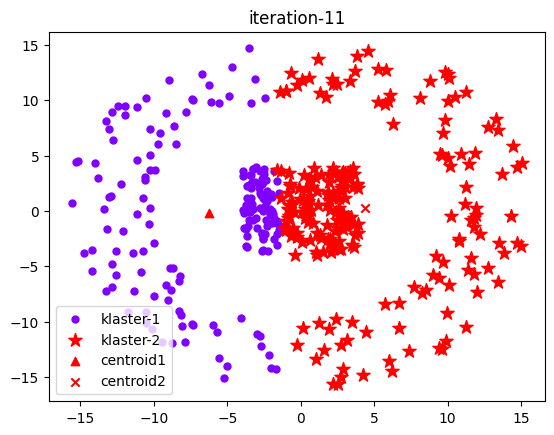

iter:  12
centroid:  [[-6.05239946 -0.18462849]
 [ 4.58497196  0.29360327]]


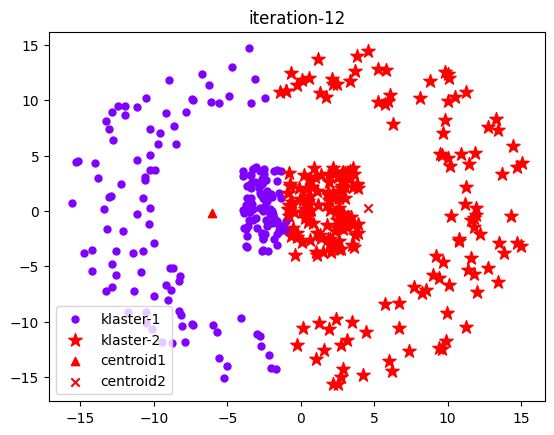

iter:  13
centroid:  [[-5.83576856 -0.18512835]
 [ 4.79406214  0.31264612]]


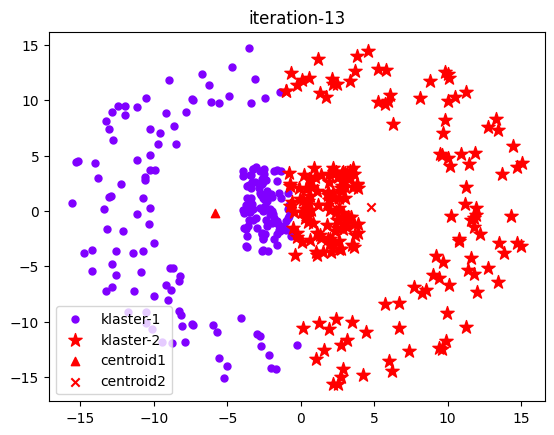

iter:  14
centroid:  [[-5.65484527 -0.15937164]
 [ 4.98523417  0.3041402 ]]


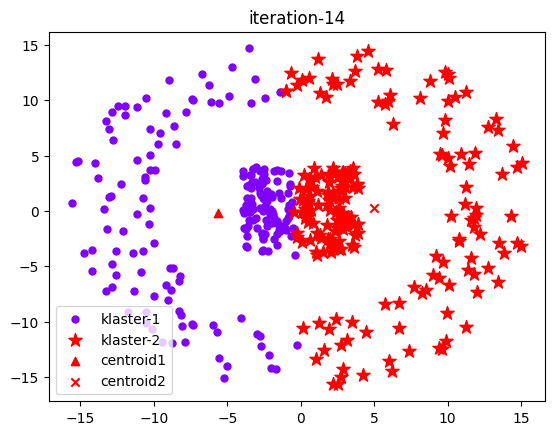

iter:  15
centroid:  [[-5.53207427 -0.07209369]
 [ 5.12909794  0.22340979]]


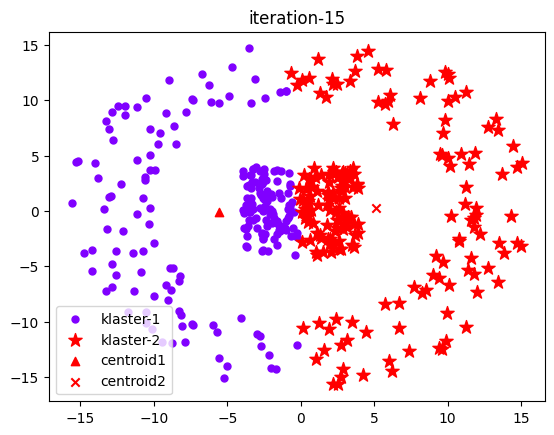

iter:  16
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


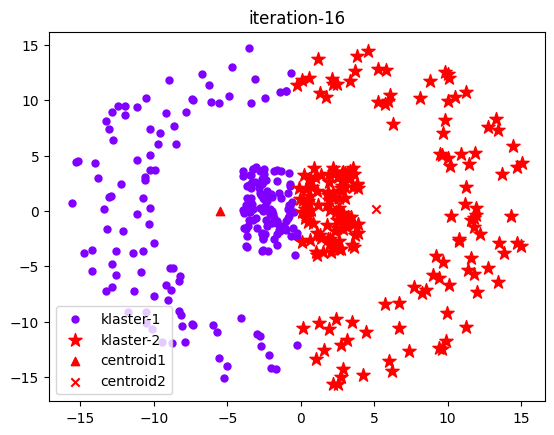

iter:  17
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


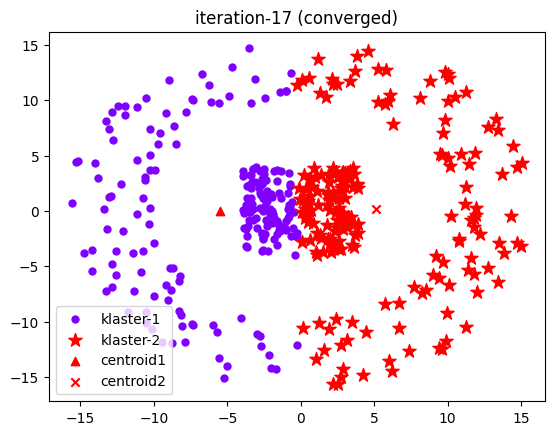

In [47]:
centroidInit = initCentroid(input, k)

#Panggil Fungsi K-Means
clusterResult, centroid = kMeans(input, centroidInit)

#Plot Hasil Final Klaster setelah Konvergen
plotClusterResult(clusterResult, centroid, str(iterationCounter) + " (converged)", 1)